### Унитарное представление текстовых данных (то есть One-Hot Encoding):

#### Кастомная реализация:

In [4]:
from numpy import argmax

In [5]:
def one_hot_encode_text(text: str = None):
    """
    Function to one hot encode the text sequence.
    :param text: Any string representation of the text.
    :return: Numpy ndarray feature tensor of encoded text.
    """
    # define the alphanumerical possible values
    alpha_nums = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789 '

    # define the mappings char to int
    char_to_int = dict((char, i) for i, char in enumerate(alpha_nums))

    # encode the input sequence
    encoded_sequence = [char_to_int[char] for char in text]

    #
    one_hot_encoded = list()
    for val in encoded_sequence:
        letter = [0 for _ in range(len(alpha_nums))]
        letter[val] = 1
        one_hot_encoded.append(letter)
    return one_hot_encoded


def one_hot_decode(encoded_sequence = None):
    # define the alphanumerical possible values
    alpha_nums = 'ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789 '

    # define the mappings char to int
    int_to_char = dict((i, char) for i, char in enumerate(alpha_nums))
    string_decoded = ""
    for i in encoded_sequence:
        string_decoded += int_to_char[argmax(i)]
    return string_decoded

In [6]:
# пример кодирования текста в виде One-Hot Encoded матрицы
encoded = one_hot_encode_text("Hello World")
print(encoded)

[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [7]:
# Так же можем провести обратный процесс декодинга
decoded = one_hot_decode(encoded)
print(decoded)

Hello World


#### Scikit-learn реализация:

In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from numpy import argmax, array


def one_hot_encode(text):
    one_hot_encoder = OneHotEncoder(sparse=False)
    label_encoder = LabelEncoder()

    data = text.split()
    vals = array(data)

    int_encoded = label_encoder.fit_transform(vals)
    int_encoded = int_encoded.reshape(len(int_encoded), 1)
    one_hot_representation = one_hot_encoder.fit_transform(int_encoded)
    return one_hot_representation

In [9]:
one_hot_encode("This is my first encoding through Scikit-Learn API")

/Users/maratmovlamov/Desktop/Projects/DS_Foundations/venv/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns

def one_hot_encode(corpora):
    vocab = set([word for sentence in [i.split() for i in corpora] for word in sentence])
    one_hot_vectorizer = CountVectorizer(binary=True)
    one_hot_encoded = one_hot_vectorizer.fit_transform(corpora).toarray()

    # Visializing
    sns.heatmap(one_hot_encoded,
                annot=True,
                cbar=False,
                xticklabels=vocab)

    return one_hot_encoded

array([[1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1]])

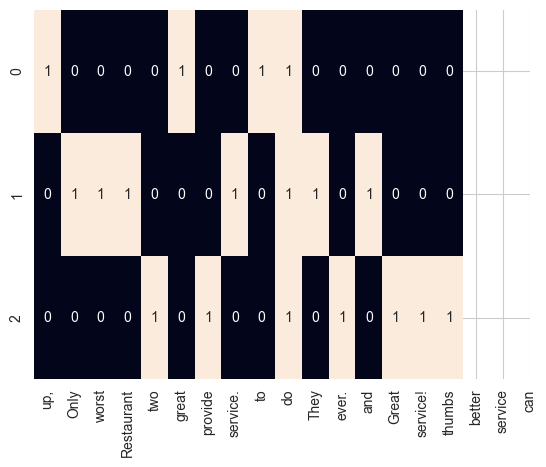

In [11]:
corpora = ["Great Restaurant and great service!", "They can do better to provide better service.", "Only two thumbs up, worst service ever."]

one_hot_encode(corpora=corpora)

### Count Vectors Representation. Представление на основе подсчета:

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def count_encode(corpora):
    vectorizer = CountVectorizer()
    vectorizer.fit(corpora)
    return vectorizer.transform(corpora).toarray()

corpora = ["Great Restaurant and great service!", "They can do better to provide better service.", "Only two thumbs up, worst service ever."]
print(count_encode(corpora))

[[1 0 0 0 0 2 0 0 1 1 0 0 0 0 0 0]
 [0 2 1 1 0 0 0 1 0 1 1 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1]]


### TF-IDF Representation. Представление на основе частоты и обратной частоты терма:

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def one_hot_encode(corpora):
    vocab = set([word for sentence in [i.split() for i in corpora] for word in sentence])
    tf_idf_vectorizer = TfidfVectorizer()
    tf_idf = tf_idf_vectorizer.fit_transform(vocab).toarray()
    return np.array(tf_idf)


corpora = ["Great Restaurant and great service!", "They can do better to provide better service.", "Only two thumbs up, worst service ever."]
print(one_hot_encode(corpora))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
